## Import statements

In [0]:
from math import pi
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn.metrics as skm
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec

## AUC plots

### AUC Overall

In [0]:
def plot_auc(df, save_plot=False, plotname='auc_plot.png'):
  auc_min = min(df.auc.values)
  auc_max = max(df.auc.values)
  
  # main plot
  x = range(len(df.eps.values[1:]))
  y = df.auc.values[1:]
  plt.plot(x, y, 'o', ls='-', linewidth=0.5)
  plt.axhline(y=df.auc.values[0], c='darkslateblue', ls='--', label='non-private model', linewidth=1.2)
  plt.title('Balanced Action+Race', fontsize=15)
  
  # colormap and gradient
  cmap = matplotlib.cm.Blues(np.linspace(0,0.6,200))
  cmap = matplotlib.colors.ListedColormap(cmap[:,1:])
  gradient = np.linspace(0, 1, 100).reshape(1, -1)
  plt.imshow(gradient, extent=[-0.5, len(x)-0.5, auc_min if auc_min<0.5 else 0.5, 1], aspect='auto', cmap=cmap)
  
  # colorbar
  cbar=plt.colorbar(ticks=[0.1, 0.9], orientation='horizontal', pad=0.1)  
  cbar.set_ticklabels(['less private', 'more private'])
  
  # s-axis settings
  plt.xticks(x, np.around(df.eps.values[1:], decimals=3))
  plt.xlabel('Epsilons', fontsize=14, labelpad=32)
  
  # y-axis settings
  plt.yticks(np.linspace(auc_min if auc_min<0.5 else 0.5, 1, 5))
  plt.ylabel('AUC', fontsize = 14)
  
  # settings
  plt.legend() # legend for the horizontal line
  plt.grid(False)
  plt.tight_layout(rect=[0, 0.03, 1, 0.90], w_pad=3)

  # save plot (default is not saving the plot)
  if save_plot:
    plt.savefig(plotname, dpi=300, transparent=True)
  
  plt.show()

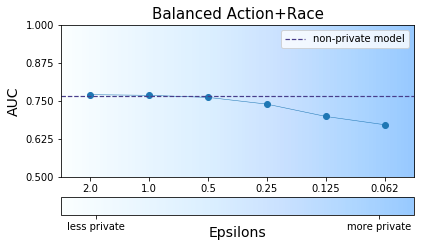

In [9]:
plot_auc(regression_balance_action_small)

In [0]:
def plot_fairness_vs_auc(df, di_metric='approval', feature='race', save_plot=False, plotname='fairness_vs_auc_plot.png'): 

  # main plot
  x = df.auc.values
  y = df['mean_di_{}_{}'.format(di_metric, feature)].values
  plt.scatter(x, y, c='blue')
  plt.axhline(y=1.2, c='darkslateblue', ls='--', label='y=1.2', linewidth=1.2)
  plt.axhline(y=0.8, c='darkslateblue', ls='--', label='y=0.8', linewidth=1.2)
  plt.title('DI {} for {} vs AUC'.format(di_metric, feature), fontsize=15)
  
  # x-axis settings
  plt.xticks(np.around(np.linspace(np.nanmin(x), np.nanmax(x), 5), decimals=3))
  plt.xlabel('AUC', fontsize=14)
  
  # y-axis settings
  plt.yticks(np.around(np.linspace(np.nanmin(y) if np.nanmin(y)<0.8 else 0.8, np.nanmax(y) if np.nanmax(y)>1.2 else 1.2, 5), decimals=3))
  plt.ylabel('Mean {} DI'.format(di_metric), fontsize = 14)
  
  # settings
  plt.grid(False)
  plt.tight_layout(rect=[0, 0.03, 1, 0.90], w_pad=3)
#   plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=5)
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.2))
  
  # save plot
  if save_plot:
    plt.savefig(plotname, dpi=300, transparent=True)
  
  plt.show()

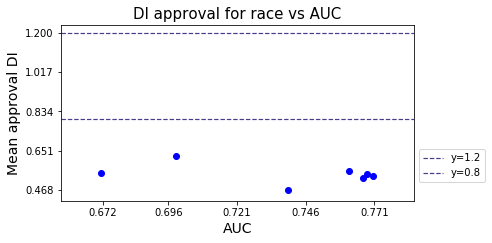

In [30]:
plot_fairness_vs_auc(regression_balance_action_small)

### AUC Comparison

In [0]:
def plot_auc_comparison(dfs, df_titles, save_plot=False, plotname='auc_comparison_plots.png'):
  auc_min_list = []
  auc_max_list = []
  for dataframe in dfs:
    auc_min_list.append(dataframe.auc.min())
    auc_max_list.append(dataframe.auc.max())   
  auc_min = min(auc_min_list)
  auc_max = max(auc_max_list)
  
  
  fig=plt.figure(figsize=(len(dfs)*6, 4))
  gs=GridSpec(1, len(dfs)) # each df in one column
  
  axes = []
  for col in range(len(dfs)):
    axes.append(fig.add_subplot(gs[0, col]))
  
  for j in range(len(dfs)):
    jth_df = dfs[j]
    
    # main plot
    x = range(len(jth_df.eps.values[1:]))
    y = jth_df.auc.values[1:]
    axes[j].plot(x, y, 'o', ls='-', linewidth=0.5)
    axes[j].set_title('AUC of {}'.format(df_titles[j]), fontweight='bold')
    axes[j].axhline(y = jth_df.auc[0], c='darkslateblue', ls='--', label='non-private model', linewidth=1.2)
    
    # colormap and gradient
    cmap = matplotlib.cm.Blues(np.linspace(0,0.6,200))
    cmap = matplotlib.colors.ListedColormap(cmap[:,1:])
    gradient = np.linspace(0, 1, 100).reshape(1, -1)
    axes[j].imshow(gradient, extent=[-0.5, len(x)-0.5, auc_min if auc_min<0.5 else 0.5, 1], aspect='auto', cmap=cmap)

    # x-axis settings
    axes[j].set_xticks(x)
    axes[j].set_xticklabels(np.around(jth_df.eps[1:], decimals=3))
    axes[j].set_xlabel('Epsilons', fontsize = 12)
    
    # y-axis settings
    axes[j].set_yticks(np.linspace(auc_min if auc_min<0.5 else 0.5, 1, 5))
    axes[j].set_yticklabels(np.around(np.linspace(auc_min if auc_min<0.5 else 0.5, 1, 5), decimals=2))
    axes[j].set_ylabel('AUC', fontsize = 12)
    axes[j].legend()
    
  # global plot setting
  plt.tight_layout(rect=[0, 0.03, 1, 0.90], h_pad=2, w_pad=3)
  fig.suptitle('Overall AUC across datasets', fontsize=15)
  
  # save plot
  if save_plot:
    plt.savefig(plotname, dpi=300, transparent=True)
    
  fig.show()

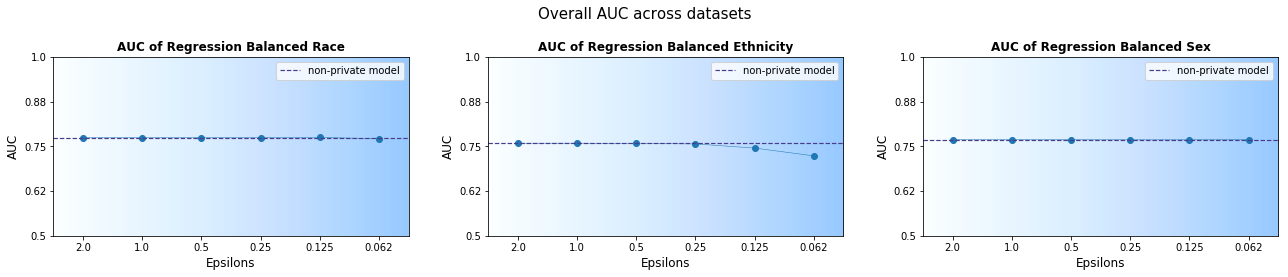

In [41]:
plot_auc_comparison([regression_balance_race, regression_balance_ethnicity, regression_balance_sex], ['Regression Balanced Race', 'Regression Balanced Ethnicity', 'Regression Balanced Sex'])

## DI Plots

### plot_fairness_metric_compare_two_superimpose(index, dfs, n_runs, labels, df_titles)

In [0]:
def plot_fairness_metric_compare_two_superimpose(index, dfs, n_runs, labels, df_titles, save_plot=False, plotname='fairness_metric_compare_two_superimpose_plot.png'):  
  
  di_metrics_abbr = ['approval', 'fn', 'fp']
  di_metrics_full = ['Approval', 'False negative', 'False positive']
  features_abbr = ['race', 'eth', 'sex']
  
  metric_abbr = di_metrics_abbr[index]
  metric = di_metrics_full[index]
  
  # generate y-axis titles
  mean_di_titles = ['Race '+metric, 'Ethicity '+metric, 'Sex '+metric]
  
  # generate column names (to call in dataframe) based on metric and feature
  mean_col_names = []
  var_col_names = []
  for feature in features_abbr:
    mean_col_names.append('mean_di_{}_{}'.format(metric_abbr, feature))
    var_col_names.append('var_di_{}_{}'.format(metric_abbr, feature))
  
  # initialize figure object
  fig=plt.figure(figsize=(2*6, 12))
  gs=GridSpec(3, 2) # 3 rows, 2 cols
  
  axes = []
  for col in range(2):
    column = []
    for row in range(1): # do one row for now
      column.append(fig.add_subplot(gs[row, col]))
    axes.append(column)
    
  # create skeleton
  for i in range(2):
    ith_column = axes[i]
    first_ith_df = dfs[i][0]
    for j in range(1): # do one row for now
      jth_row = ith_column[j]
      # title
      if j == 0:
        jth_row.set_title(df_titles[i], fontweight='bold', fontsize=16)
        
#       # colormap and gradient
#       cmap = matplotlib.cm.Blues(np.linspace(0,0.6,200))
#       cmap = matplotlib.colors.ListedColormap(cmap[:,1:])
#       gradient = np.linspace(0, 1, 100).reshape(1, -1)
#       jth_row.imshow(gradient, extent=[-0.5, len(first_ith_df.eps.values[1:])-0.5, 0.2, 1.2], aspect='auto', cmap=cmap)

      # x-axis settings
      jth_row.set_xticks(range(len(first_ith_df.eps.values[1:])))
      jth_row.set_xticklabels(np.around(first_ith_df.eps.values[1:], decimals=3), fontsize=12)
      jth_row.set_xlabel('Epsilons', fontsize=14)
      # y-axis settings
      jth_row.set_yticks(np.linspace(0.2, 1.2, 6))
      jth_row.set_yticklabels(np.around(np.linspace(0.2, 1.2, 6), decimals=2), fontsize=12)
      if i == 0:  
        jth_row.set_ylabel(mean_di_titles[j], fontsize=14)
      # no grid
      jth_row.grid(False)
   
  # define colors
  plot_colors = ['#0081AF', '#5AAA95']
  hline_colors = ['#00487C', '#D0E562'] # dark blue, green
  ecolors = ['#49C6E5', '#C1FF9B'] # light blue, green
  
  # superimpose main plots
  for col in range(2):
    for d in range(len(dfs[col])):
      df = dfs[col][d]
      df_n_runs = n_runs[col]
      for row in range(1): # do one row for now
        ax = axes[col][row]
        
        # define variables
        x = range(len(df.eps.values[1:]))
        y = df[mean_col_names[row]][1:]
        yerr = np.sqrt(df[var_col_names[row]][1:]/df_n_runs)
        
        # main plot
        ax.errorbar(x, y, yerr, fmt='o', ls=':', c=plot_colors[d], ecolor=ecolors[d], elinewidth=3, capsize=0, label=labels[d])
        # non-private model baseline
        ax.axhline(y = df[mean_col_names[row]][0], c=hline_colors[d], ls='--', label='{} non-private model'.format(labels[d]), linewidth=1.2)
        ax.set_yticks(np.linspace(0.2, 1.2, 6))
        
        # add legal box
        rect = patches.Rectangle((0, 0.8),len(df.eps.values[1:])-1,0.4,
                                  hatch='/', edgecolor='lightgrey',facecolor='none')
#         rect = patches.Rectangle((0, 0.8),len(df.eps.values[1:])-1,0.4,
#                                  color='aliceblue',facecolor='none')
        ax.add_patch(rect)

  # global plot setting
  plt.tight_layout(rect=[0, 0.03, 0.98, 0.95], h_pad=3, w_pad=1)
  plt.legend(loc='upper center', bbox_to_anchor=(-0.06, -0.25), fancybox=True, shadow=True, ncol=5)
  fig.suptitle('{} Disparate Impact'.format(metric), fontsize=22)
  
  # save plot
  if save_plot:
    plt.savefig(plotname, dpi=300, transparent=True)
    
  fig.show()

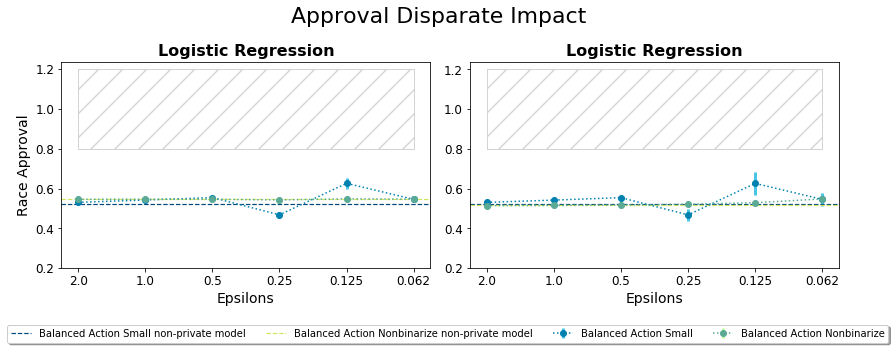

In [0]:
plot_fairness_metric_compare_two_superimpose(0, [[df_r_action_small, df_r_action_full], [df_r_action_small, df_r_action_full_nonbinarize]], [50, 10], ['Balanced Action Small', 'Balanced Action Nonbinarize'], ['Logistic Regression', 'Logistic Regression'])

### DI one metric (same metric, race/eth/sex)
0 - Approval Disparate Impact  
1 - False Negative Disparate Impact  
2 - False Positive Disparate Impact

In [0]:
def plot_fairness_metric(index, df, save_plot=False, plotname='fairness_metric_plot.png'):
  
  di_metrics_abbr = ['approval', 'fn', 'fp']
  di_metrics_full = ['Approval', 'False negative', 'False positive']
  features_abbr = ['race', 'eth', 'sex']
  
  metric_abbr = di_metrics_abbr[index]
  metric = di_metrics_full[index]
  
  # generate y-axis titles based on features
  mean_di_titles = ['Race '+metric, 'Ethicity '+metric, 'Sex '+metric]
  
  # generate column names (to call in dataframe) based on metric and feature
  mean_col_names = []
  var_col_names = []
  for feature in features_abbr:
    mean_col_names.append('mean_di_{}_{}'.format(metric_abbr, feature))
    var_col_names.append('var_di_{}_{}'.format(metric_abbr, feature))
  
  # locate max and min values (for generating ticks values)
  mean_min = min(df[mean_col_names].min())
  mean_max = max(df[mean_col_names].max())
  var_min = min(df[var_col_names].min())
  var_max = max(df[var_col_names].max())
  
  # initialize figure object
  fig=plt.figure(figsize=(6, 10))
  gs=GridSpec(3,1)

  mean_axes = []

  for row in range(3):
      mean_axes.append(fig.add_subplot(gs[row, 0]))

  for j in range(len(mean_axes)):
      # main plot
      x = range(len(df.eps.values))
      y = df[mean_col_names[j]].values
      yerr = df[var_col_names[j]].values
      mean_axes[j].errorbar(x, y, yerr, fmt='o', ls=':',
                            ecolor='cornflowerblue', elinewidth=3, capsize=0)
      
      # 0.8 < DI < 1.2 by law
      mean_axes[j].axhline(y = 1.2, linewidth=1, color='black', ls=':')
      mean_axes[j].axhline(y = 1, linewidth=1, color='grey', ls=':')
      mean_axes[j].axhline(y = 0.8, linewidth=1, color='black', ls=':')
      
      # x-axis settings
      mean_axes[j].set_xticks(range(len(df.eps.values)))
      mean_axes[j].set_xticklabels(df.eps.values, rotation=70)
      mean_axes[j].set_xlabel('Epsilons', fontsize=12)
      
      # y-axis settings
      mean_axes[j].set_yticks(np.linspace(mean_min-var_max, mean_max+var_max, 5))
      mean_axes[j].set_yticklabels(np.around(np.linspace(mean_min-var_max, mean_max+var_max, 5), decimals=2))
      mean_axes[j].set_ylabel(mean_di_titles[j], fontsize=12)
      mean_axes[j].get_yaxis().set_label_coords(-0.1,0.5)
      
      mean_axes[j].grid(False)

  # global plot setting
  plt.tight_layout(rect=[0, 0.03, 0.98, 0.95], h_pad=5)
  fig.suptitle('Disparate Impact: {}'.format(metric), fontsize=16)
  
  # save plot
  if save_plot:
    plt.savefig(plotname, dpi=300, transparent=True)
    
  fig.show()

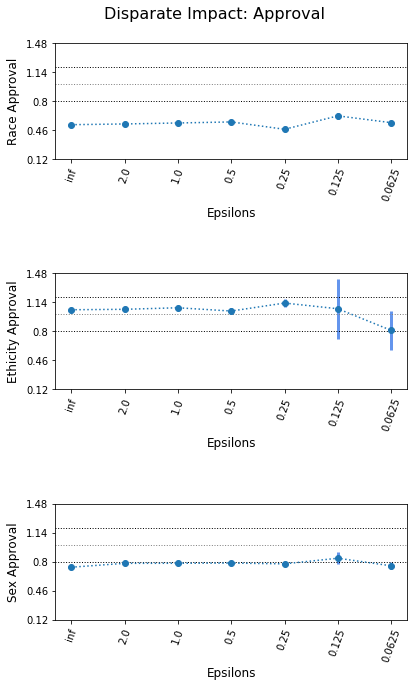

In [43]:
plot_fairness_metric(0, regression_balance_action_small)

### DI one feature (same feature, approval/fn)

In [0]:
def plot_fairness_metric_by_feature(index, df, save_plot=False, plotname='fairness_metric_by_feature_plot.png'):
  # define font sizes
  fs_title = 22
  fs_axis_label = 16
  fs_tick_label = 13
  
  features_full = ['Race', 'Ethnicity', 'Sex']
  features_abbr = ['race', 'eth', 'sex']
  di_metrics_abbr = ['approval', 'fn', 'fp']
  
  feature = features_full[index]
  feature_abbr = features_abbr[index]
  
  # generate y-axis titles
  mean_feature_titles = ['Approval DI\n for '+feature, 'FN DI\n for '+feature, 'FP DI\n for '+feature]
  
  # generate column names (to call in dataframe) based on metric and feature
  mean_col_names = []
  var_col_names = []
  for metric_abbr in di_metrics_abbr:
    mean_col_names.append('mean_di_{}_{}'.format(metric_abbr, feature_abbr))
    var_col_names.append('var_di_{}_{}'.format(metric_abbr, feature_abbr))
  
  # locate max and min values (for generating ticks values)
  mean_min = min(df[mean_col_names].min())
  mean_max = max(df[mean_col_names].max())
  var_min = min(df[var_col_names].min())
  var_max = max(df[var_col_names].max())
  
  # initialize figure object
  num_cols = len(mean_feature_titles)
  fig=plt.figure(figsize=(num_cols*7, 4))
  gs=GridSpec(1,num_cols) # 1 row

  mean_axes = []

  for col in range(num_cols):
      mean_axes.append(fig.add_subplot(gs[0, col]))
      
  for j in range(len(mean_axes)):
      # main plot
      x = range(len(df.eps.values))
      y = df[mean_col_names[j]].values
      yerr = df[var_col_names[j]].values
      mean_axes[j].errorbar(x, y, yerr, fmt='o', ls=':',
                            ecolor='cornflowerblue', elinewidth=3, capsize=0)

      # 0.8 < DI < 1.2 by law
      mean_axes[j].axhline(y = 1.2, linewidth=1, color='black', ls=':', label='y=1.2')
      mean_axes[j].axhline(y = 1, linewidth=1, color='grey', ls=':', label='y=1.0')
      mean_axes[j].axhline(y = 0.8, linewidth=1, color='black', ls=':', label='y=0.8')
      
      # x-axis settings
      mean_axes[j].set_xticks(range(len(df.eps.values)))
      mean_axes[j].set_xticklabels(np.around(df.eps.values, decimals=3), fontsize=fs_tick_label)
      mean_axes[j].set_xlabel('Epsilons', fontsize=fs_axis_label)
      mean_axes[j].get_xaxis().set_label_coords(0.5, -0.2)
      
      # y-axis settings
      mean_axes[j].set_yticks(np.linspace(mean_min-var_max, mean_max+var_max, 5))
      mean_axes[j].set_yticklabels(np.around(np.linspace(mean_min-var_max, mean_max+var_max, 5), decimals=2), fontsize=fs_tick_label)
      mean_axes[j].set_ylabel(mean_feature_titles[j], fontsize=fs_axis_label)
      mean_axes[j].get_yaxis().set_label_coords(-0.1,0.5)
      
      mean_axes[j].grid(False)
      
  # global plot setting
  plt.tight_layout(rect=[0, 0.03, 0.98, 0.9], h_pad=5, w_pad=3)
  fig.suptitle('{} Disparate Impact'.format(feature), fontsize=fs_title)
  
  # save plot
  if save_plot:
    plt.savefig(plotname, dpi=300, transparent=True)
    
  fig.show()

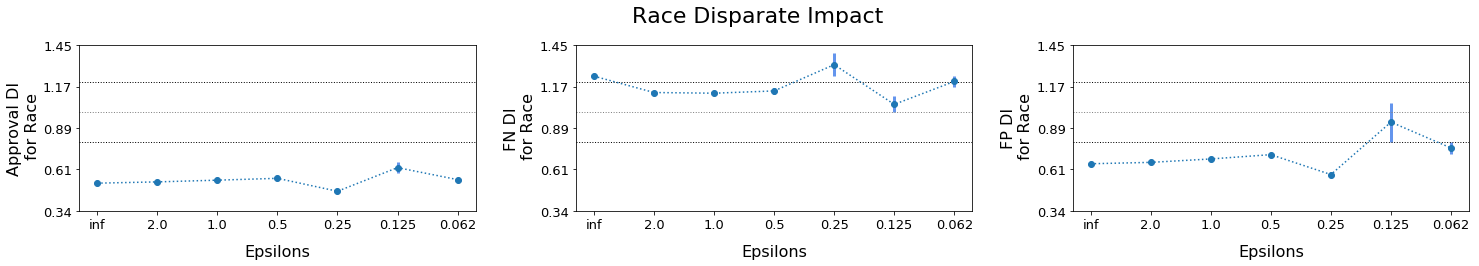

In [51]:
plot_fairness_metric_by_feature(0, regression_balance_action_small)

### DI one metric comparison

In [0]:
def plot_fairness_metric_comparison(index, dfs, df_titles, save_plot=False, plotname='fairness_metric_comparison_plot.png'):
  
  di_metrics_abbr = ['approval', 'fn', 'fp']
  di_metrics_full = ['Approval', 'False negative', 'False positive']
  features_abbr = ['race', 'eth', 'sex']
  
  metric_abbr = di_metrics_abbr[index]
  metric = di_metrics_full[index]
  
  # generate y-axis titles
  mean_di_titles = ['Race '+metric, 'Ethicity '+metric, 'Sex '+metric]
  
  # generate column names (to call in dataframe) based on metric and feature
  mean_col_names = []
  var_col_names = []
  for feature in features_abbr:
    mean_col_names.append('mean_di_{}_{}'.format(metric_abbr, feature))
    var_col_names.append('var_di_{}_{}'.format(metric_abbr, feature))
  
  # locate max and min values (for generating ticks values)
  mean_min_list = []
  mean_max_list = []
  var_min_list = []
  var_max_list = []
  
  for dataframe in dfs:
    mean_min_list.append(min(dataframe[mean_col_names].min()))
    mean_max_list.append(max(dataframe[mean_col_names].max()))
    var_min_list.append(min(dataframe[var_col_names].min()))
    var_max_list.append(max(dataframe[var_col_names].max()))

  mean_min = min(mean_min_list)
  mean_max = max(mean_max_list)
  var_min = min(var_min_list)
  var_max = max(var_max_list)
  
  # initialize figure object
  fig=plt.figure(figsize=(len(dfs)*8, 12))
  gs=GridSpec(3, len(dfs)) # each df in one column, each metric in one row
  
  axes = []
  for col in range(len(dfs)):
    column = []
    for row in range(3):
      column.append(fig.add_subplot(gs[row, col]))
    axes.append(column)
    
  for k in range(len(dfs)):
    kth_column = axes[k]
    kth_df = dfs[k]
    
    for j in range(len(kth_column)):
      jth_row = kth_column[j]
      
      # main plot
      x = range(len(kth_df.eps.values[1:]))
      y = kth_df[mean_col_names[j]][1:]
      yerr = kth_df[var_col_names[j]][1:]
      jth_row.errorbar(x, y, yerr, fmt='o', ls=':',
                            ecolor='cornflowerblue', elinewidth=3, capsize=0)
      if j == 0:
        jth_row.set_title(df_titles[k], fontweight='bold', fontsize=16)

      # non-private model baseline
      jth_row.axhline(y = kth_df[mean_col_names[j]][0], c='darkslateblue', ls='--', label='non-private model', linewidth=1.2)
      # 0.8 < DI < 1.2 by law
      jth_row.axhline(y = 1.2, linewidth=1, color='black', ls=':')
      jth_row.axhline(y = 1, linewidth=1, color='grey', ls=':')
      jth_row.axhline(y = 0.8, linewidth=1, color='black', ls=':')
      
      # x-axis settings
      jth_row.set_xticks(range(len(kth_df.eps.values[1:])))
      jth_row.set_xticklabels(np.around(kth_df.eps.values[1:], decimals=3), fontsize=12)
      jth_row.set_xlabel('Epsilons', fontsize=14)
      
      # y-axis settings
      jth_row.set_yticks(np.linspace(0.4, 1.2, 5))
      jth_row.set_yticklabels(np.around(np.linspace(0.4, 1.2, 5), decimals=2), fontsize=12)
      jth_row.set_ylabel(mean_di_titles[j], fontsize=14)

      jth_row.grid(False)
    
  # global plot setting
  plt.tight_layout(rect=[0, 0.03, 0.98, 0.95], h_pad=3, w_pad=3)
  fig.suptitle('{} Disparate Impact'.format(metric), fontsize=22)
  
  # save plot
  if save_plot:
    plt.savefig(plotname, dpi=300, transparent=True)
    
  fig.show()

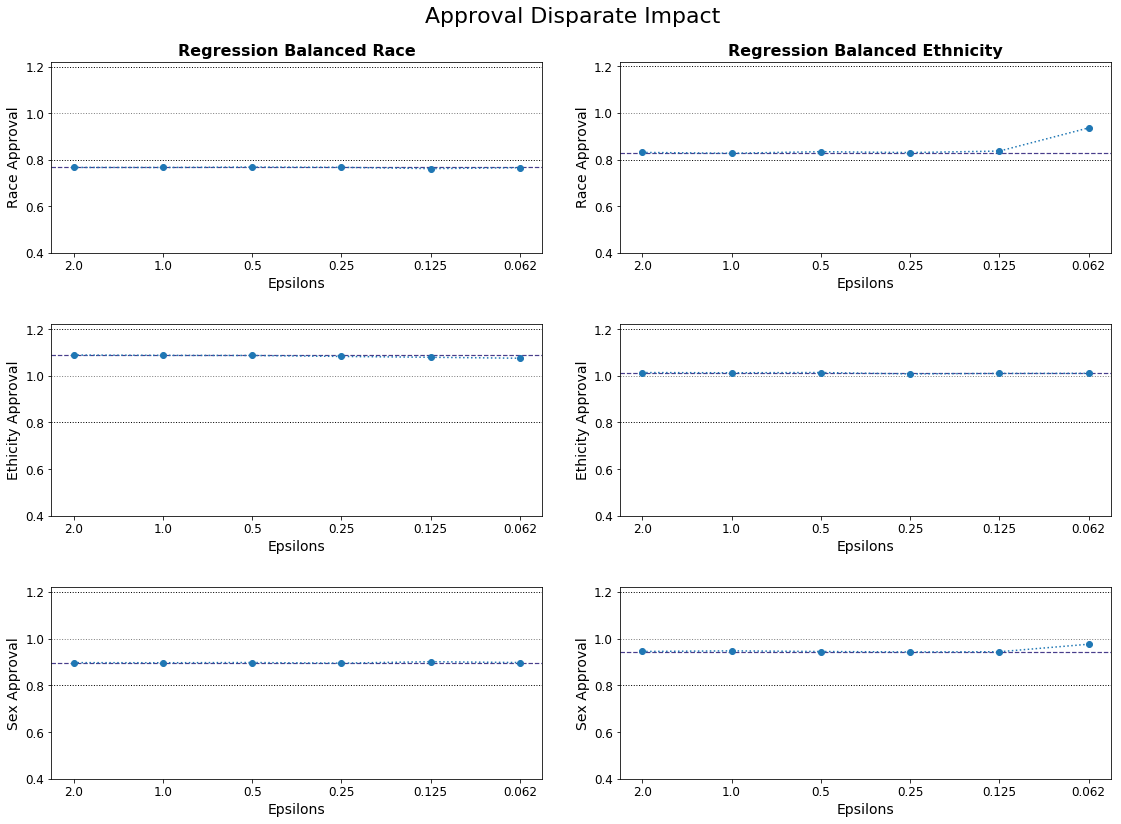

In [57]:
plot_fairness_metric_comparison(0, [regression_balance_race, regression_balance_ethnicity], ['Regression Balanced Race', 'Regression Balanced Ethnicity'])